In [223]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context("notebook", font_scale=.6)


In [224]:
# Importing and previewing data set. 
df = pd.read_excel('data/credit_default.xls',index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [225]:
# Renaming colomns appropriately.

col_names = df.iloc[0]
df = df[1:]
df.columns = col_names

col_details = {'PAY_0':'SEP_PAYMENT_STATUS',
               'PAY_2':'AUG_PAYMENT_STATUS',
               'PAY_3':'JUL_PAYMENT_STATUS',
               'PAY_4':'JUN_PAYMENT_STATUS',
               'PAY_5':'MAY_PAYMENT_STATUS',
               'PAY_6':'APR_PAYMENT_STATUS',
               'BILL_AMT1':'SEP_BILL',
               'BILL_AMT2':'AUG_BILL',
               'BILL_AMT3':'JUL_BILL',
               'BILL_AMT4':'JUN_BILL',
               'BILL_AMT5':'MAY_BILL',
               'BILL_AMT6':'APR_BILL',
               'PAY_AMT1':'SEP_PAYMENT',
               'PAY_AMT2':'AUG_PAYMENT',
               'PAY_AMT3':'JUL_PAYMENT',
               'PAY_AMT4':'JUN_PAYMENT',
               'PAY_AMT5':'MAY_PAYMENT',
               'PAY_AMT6':'APR_PAYMENT',
               'default payment next month':'DEFAULT_NEXT_MONTH'
              }
df.rename(columns=col_details, inplace=True)

df = df.apply(pd.to_numeric)

# For presentation
df_decoded = df
users = len(df_decoded)

In [226]:
df_decoded.loc[(df['SEP_PAYMENT_STATUS'] == -2)
       & (df['AUG_PAYMENT_STATUS'] == -2)
       & (df['JUL_PAYMENT_STATUS'] == -2)
       & (df['JUN_PAYMENT_STATUS'] == -2)
       & (df['MAY_PAYMENT_STATUS'] == -2)
       & (df['APR_PAYMENT_STATUS'] == -2), 
       'CUSTOMER_ENGAGEMENT'] = 'Inactive'

df.CUSTOMER_ENGAGEMENT = df.CUSTOMER_ENGAGEMENT.fillna("Active")

In [227]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BINNED'] = pd.cut(x=df['AGE'], bins=bins, labels=labels, right=True)

In [144]:
df_decoded.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAYMENT_STATUS,AUG_PAYMENT_STATUS,JUL_PAYMENT_STATUS,JUN_PAYMENT_STATUS,MAY_PAYMENT_STATUS,...,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,DEFAULT_NEXT_MONTH,CUSTOMER_ENGAGEMENT,AGE_BINNED
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,Active,21-30
2,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,Active,21-30
3,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,Active,31-40
4,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,Active,31-40
5,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,Active,51-60


In [229]:
df_decoded['SEX'].replace([1,2],['Male','Female'],inplace=True)
df_decoded['EDUCATION'].replace([1,2,3,0,4,5,6],['Graduate School','College',
                                               'High School','Other','Other',
                                               'Other','Other'],inplace=True)
df_decoded['MARRIAGE'].replace([1,2,3,0],['Married','Single','Divorved','Other']
                               ,inplace=True)
df_decoded['DEFAULT_NEXT_MONTH'].replace([0,1],['No','Yes'],inplace=True)

df_decoded['SEP_PAYMENT_STATUS'].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                    ['No Consumption','Paid in Full',
                     'Used Revolving Credit', '1 Month Payment Delay',
                     '2 Month Payment Delay', '3 Month Payment Delay',
                     '4 Month Payment Delay', '5 Month Payment Delay',
                     '6 Month Payment Delay', '7 Month Payment Delay',
                     '8 Month Payment Delay',
                     'Payment Delay of 9 Months or More'],inplace=True)
df_decoded['AUG_PAYMENT_STATUS'].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                    ['No Consumption','Paid in Full',
                     'Used Revolving Credit', '1 Month Payment Delay',
                     '2 Month Payment Delay', '3 Month Payment Delay',
                     '4 Month Payment Delay', '5 Month Payment Delay',
                     '6 Month Payment Delay', '7 Month Payment Delay',
                     '8 Month Payment Delay',
                     'Payment Delay of 9 Months or More'],inplace=True)
df_decoded['JUL_PAYMENT_STATUS'].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                    ['No Consumption','Paid in Full',
                     'Used Revolving Credit', '1 Month Payment Delay',
                     '2 Month Payment Delay', '3 Month Payment Delay',
                     '4 Month Payment Delay', '5 Month Payment Delay',
                     '6 Month Payment Delay', '7 Month Payment Delay',
                     '8 Month Payment Delay',
                     'Payment Delay of 9 Months or More'],inplace=True)
df_decoded['JUN_PAYMENT_STATUS'].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                    ['No Consumption','Paid in Full',
                     'Used Revolving Credit', '1 Month Payment Delay',
                     '2 Month Payment Delay', '3 Month Payment Delay',
                     '4 Month Payment Delay', '5 Month Payment Delay',
                     '6 Month Payment Delay', '7 Month Payment Delay',
                     '8 Month Payment Delay',
                     'Payment Delay of 9 Months or More'],inplace=True)
df_decoded['MAY_PAYMENT_STATUS'].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                    ['No Consumption','Paid in Full',
                     'Used Revolving Credit', '1 Month Payment Delay',
                     '2 Month Payment Delay', '3 Month Payment Delay',
                     '4 Month Payment Delay', '5 Month Payment Delay',
                     '6 Month Payment Delay', '7 Month Payment Delay',
                     '8 Month Payment Delay',
                     'Payment Delay of 9 Months or More'],inplace=True)
df_decoded['APR_PAYMENT_STATUS'].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                    ['No Consumption','Paid in Full',
                     'Used Revolving Credit', '1 Month Payment Delay',
                     '2 Month Payment Delay', '3 Month Payment Delay',
                     '4 Month Payment Delay', '5 Month Payment Delay',
                     '6 Month Payment Delay', '7 Month Payment Delay',
                     '8 Month Payment Delay',
                     '9 Months Payment Delay or More'],inplace=True)


In [146]:
df_decoded.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAYMENT_STATUS,AUG_PAYMENT_STATUS,JUL_PAYMENT_STATUS,JUN_PAYMENT_STATUS,MAY_PAYMENT_STATUS,...,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,DEFAULT_NEXT_MONTH,CUSTOMER_ENGAGEMENT,AGE_BINNED
1,20000,Female,College,Married,24,2 Month Payment Delay,2 Month Payment Delay,Paid in Full,Paid in Full,No Consumption,...,0,0,689,0,0,0,0,Yes,Active,21-30
2,120000,Female,College,Single,26,Paid in Full,2 Month Payment Delay,Used Revolving Credit,Used Revolving Credit,Used Revolving Credit,...,3261,0,1000,1000,1000,0,2000,Yes,Active,21-30
3,90000,Female,College,Single,34,Used Revolving Credit,Used Revolving Credit,Used Revolving Credit,Used Revolving Credit,Used Revolving Credit,...,15549,1518,1500,1000,1000,1000,5000,No,Active,31-40
4,50000,Female,College,Married,37,Used Revolving Credit,Used Revolving Credit,Used Revolving Credit,Used Revolving Credit,Used Revolving Credit,...,29547,2000,2019,1200,1100,1069,1000,No,Active,31-40
5,50000,Male,College,Married,57,Paid in Full,Used Revolving Credit,Paid in Full,Used Revolving Credit,Used Revolving Credit,...,19131,2000,36681,10000,9000,689,679,No,Active,51-60


In [251]:
df_noactivity = df_decoded[df['SEP_PAYMENT_STATUS'] == 'No Consumption' ]
df_paidinfull = df_decoded[df['SEP_PAYMENT_STATUS'] == 'Paid in Full' ]
df_1delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '1 Month Payment Delay' ]
df_2delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '2 Month Payment Delay' ]
df_3delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '3 Month Payment Delay' ]
df_4delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '4 Month Payment Delay' ]
df_5delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '5 Month Payment Delay' ]
df_6delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '6 Month Payment Delay' ]
df_7delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '7 Month Payment Delay' ]
df_8delay = df_decoded[df['SEP_PAYMENT_STATUS'] == '8 Month Payment Delay' ]

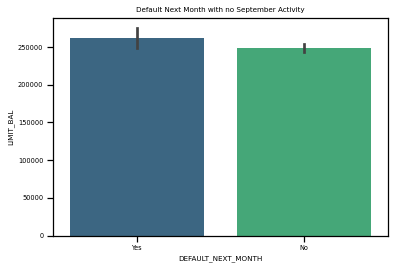

In [309]:
ax = sns.barplot(data=df_noactivity, x='DEFAULT_NEXT_MONTH',
                 y='LIMIT_BAL', order=['Yes', 'No'],palette="viridis")
ax.set_title('Default Next Month with no September Activity')
plt.show()

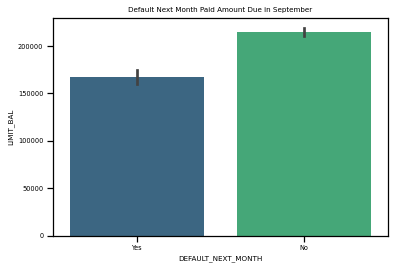

In [310]:
ax = sns.barplot(data=df_paidinfull, x='DEFAULT_NEXT_MONTH',
                 y='LIMIT_BAL', order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month Paid Amount Due in September')
plt.show()

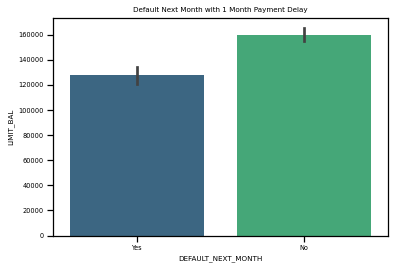

In [311]:
ax = sns.barplot(data=df_1delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL',
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 1 Month Payment Delay')
plt.show()

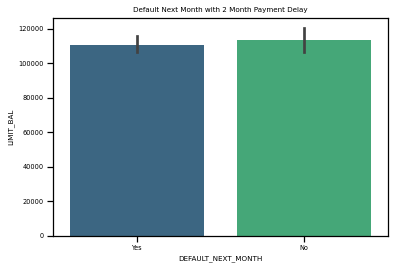

In [312]:
ax = sns.barplot(data=df_2delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL', 
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 2 Month Payment Delay')
plt.show()

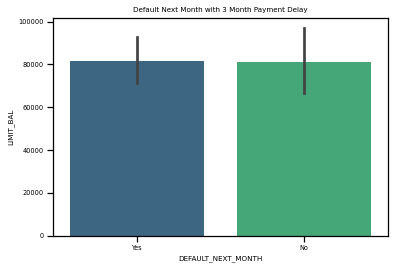

In [313]:
ax = sns.barplot(data=df_3delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL', 
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 3 Month Payment Delay')

plt.show()

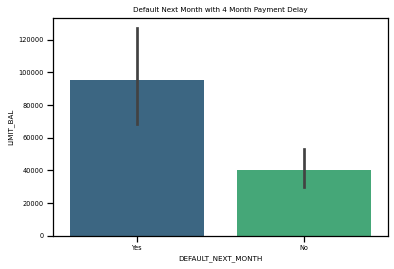

In [314]:
ax = sns.barplot(data=df_4delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL',
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 4 Month Payment Delay')
plt.show()

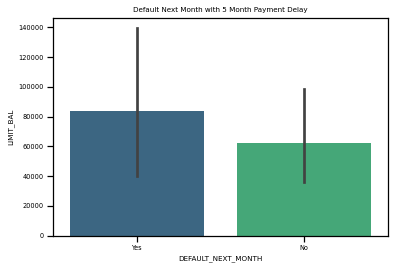

In [315]:
ax = sns.barplot(data=df_5delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL',
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 5 Month Payment Delay')
plt.show()

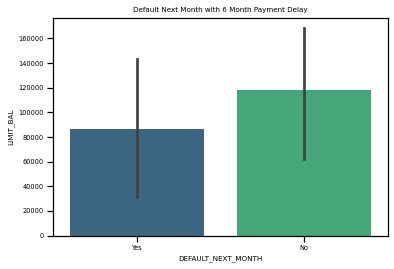

In [316]:
ax = sns.barplot(data=df_6delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL', 
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 6 Month Payment Delay')
plt.show()

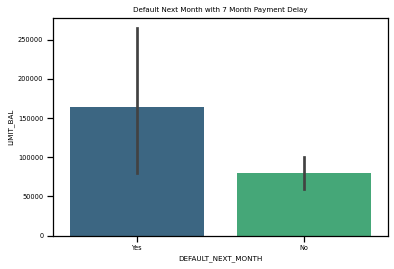

In [317]:
ax = sns.barplot(data=df_7delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL',
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 7 Month Payment Delay')
plt.show()

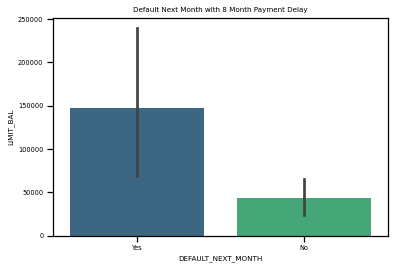

In [318]:
ax = sns.barplot(data=df_8delay, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL', 
                 order=['Yes', 'No'], palette="viridis")
ax.set_title('Default Next Month with 8 Month Payment Delay')
plt.show()

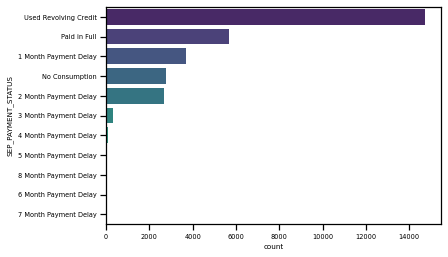

In [320]:
sns.countplot(data=df_decoded, y='SEP_PAYMENT_STATUS', palette="viridis",
             order = df_decoded['SEP_PAYMENT_STATUS'].value_counts().index)
plt.show()

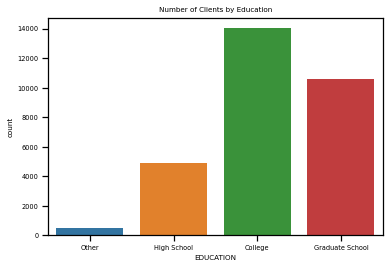

In [324]:
ax = sns.countplot(data=df_decoded, x='EDUCATION', order=['Other', 'High School', 'College', 'Graduate School'])
ax.set_title('Number of Clients by Education')
plt.show()

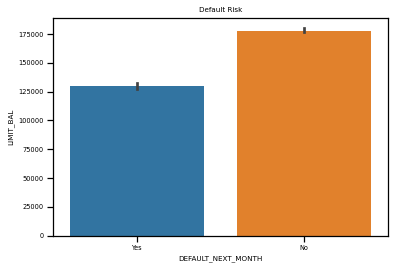

In [325]:
ax = sns.barplot(data=df_decoded, x='DEFAULT_NEXT_MONTH', y='LIMIT_BAL')
ax.set_title('Default Risk')
plt.show()

In [147]:
print(f'There are a total of {len(df_decoded)} credit card clients')

There are a total of 30000 credit card clients


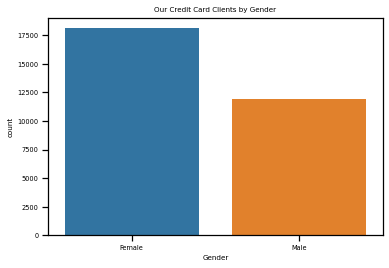

In [148]:
# Overall plots
ax0 = sns.countplot(x="SEX", data=df_decoded)
ax0.set(xlabel='Gender', title='Our Credit Card Clients by Gender')
plt.show()


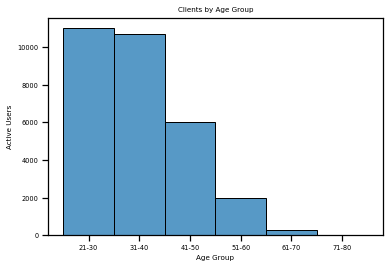

In [149]:
ax1 = sns.histplot(data=df_decoded, x="AGE_BINNED")
ax1.set(xlabel='Age Group', ylabel='Active Users', 
       title='Clients by Age Group')
plt.show()

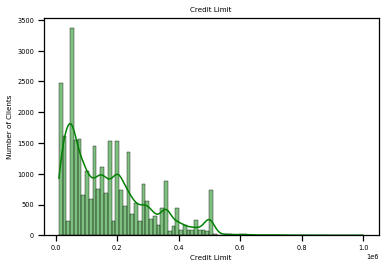

In [150]:
ax2 = sns.histplot(df_decoded['LIMIT_BAL'],kde=True, color="green")
ax2.set(xlabel='Credit Limit', ylabel='Number of Clients', 
       title='Credit Limit')
plt.show()

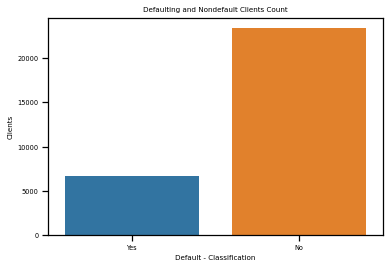

In [151]:
# Default and Nondefault Count
ax3 = sns.countplot(x="DEFAULT_NEXT_MONTH", data=df_decoded)
ax3.set(xlabel='Default - Classification', ylabel='Clients',
       title='Defaulting and Nondefault Clients Count')
plt.show()

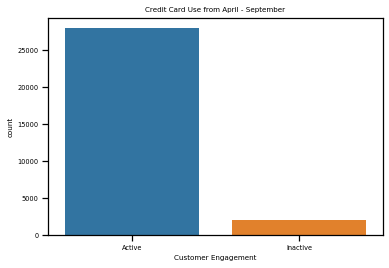

In [162]:
ax4 = sns.countplot(x="CUSTOMER_ENGAGEMENT", data=df_decoded)
ax4.set(xlabel='Customer Engagement', title='Credit Card Use from April - September')
plt.show()

In [163]:
print(f'{round((len(df_active)/len(df_decoded))*100,1)}% ({len(df_active)}) of our clients are active.')

93.0% (27891) of our clients are active.


In [164]:
df_active = df.loc[(df['CUSTOMER_ENGAGEMENT'] == "Active")]

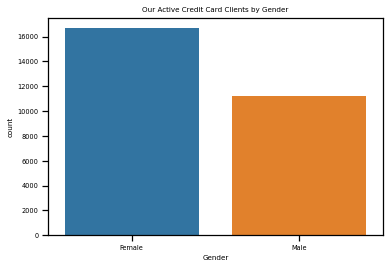

In [154]:
# Overall plots
ax5 = sns.countplot(x="SEX", data=df_active)
ax5.set(xlabel='Gender', title='Our Active Credit Card Clients by Gender')
plt.show()

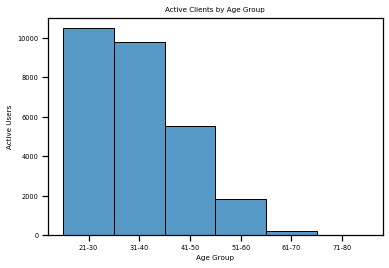

In [155]:
ax6 = sns.histplot(data=df_active, x="AGE_BINNED")
ax6.set(xlabel='Age Group', ylabel='Active Users', 
       title='Active Clients by Age Group')
plt.show()

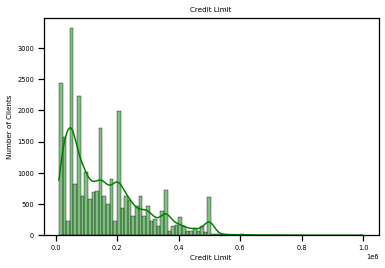

In [156]:
ax7 = sns.histplot(df_active['LIMIT_BAL'],kde=True, color="green")
ax7.set(xlabel='Credit Limit', ylabel='Number of Clients', 
       title='Credit Limit')
plt.show()

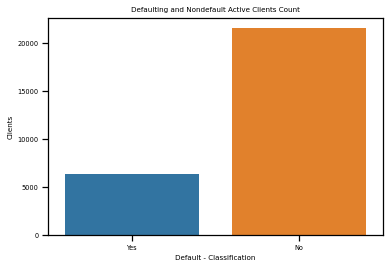

In [157]:
# Default and Nondefault Count
ax8 = sns.countplot(x="DEFAULT_NEXT_MONTH", data=df_active)
ax8.set(xlabel='Default - Classification', ylabel='Clients',
       title='Defaulting and Nondefault Active Clients Count')
plt.show()

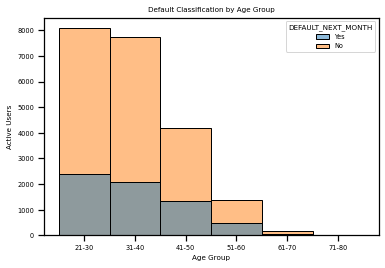

In [158]:
ax9 = sns.histplot(data=df_active, x="AGE_BINNED", hue="DEFAULT_NEXT_MONTH" )
ax9.set(xlabel='Age Group', ylabel='Active Users', 
       title='Default Classification by Age Group')
plt.show()

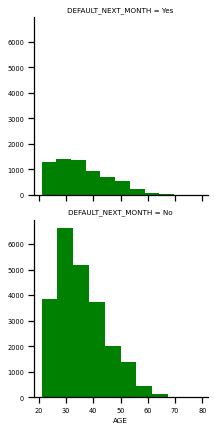

In [159]:

g = sns.FacetGrid(df, row='DEFAULT_NEXT_MONTH')
g = g.map(plt.hist, 'AGE', color='green')
plt.show()

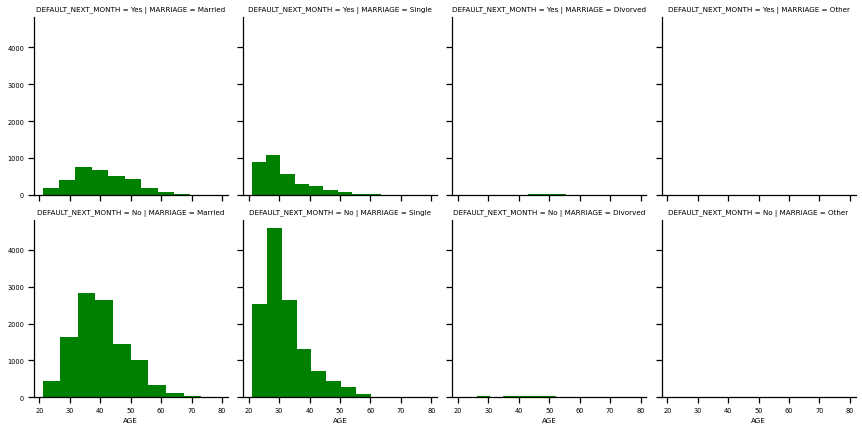

In [160]:
g = sns.FacetGrid(df, row='DEFAULT_NEXT_MONTH', col='MARRIAGE')
g = g.map(plt.hist, 'AGE', color='green')
plt.show()

For single customers, the risk of defaulting decreases at age 40. For married customers, the rish of defaulting decreases sharply at age 30.

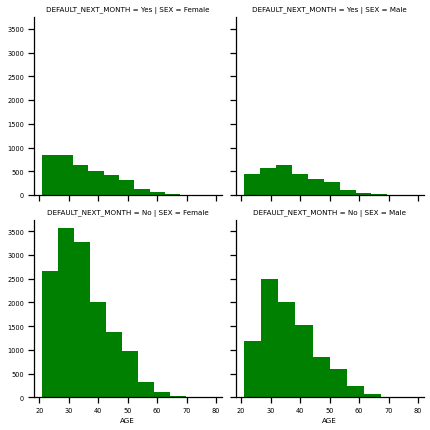

In [161]:
g = sns.FacetGrid(df, row='DEFAULT_NEXT_MONTH', col='SEX')
g = g.map(plt.hist, 'AGE', color='green')
plt.show()

In [130]:
df_active.DEFAULT_NEXT_MONTH.value_counts(normalize=True)*100

No     77.225628
Yes    22.774372
Name: DEFAULT_NEXT_MONTH, dtype: float64

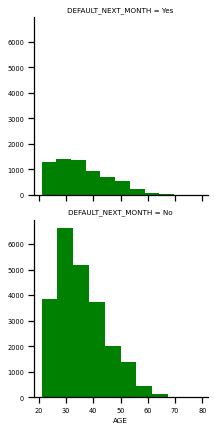

In [165]:
g = sns.FacetGrid(df, row='DEFAULT_NEXT_MONTH')
g = g.map(plt.hist, 'AGE', color='green')
plt.show()

In [129]:
# Cost of defaulting
default_cost = df_active[(df_active['DEFAULT_NEXT_MONTH'] == 'Yes')]['SEP_BILL'].sum()

sep_bill_sum = df_active['SEP_BILL'].sum()

# # Percent of sep company income
print(f'Cost in September from defaults {round((default_cost/sep_bill_sum)*100,0)}%')


Cost in September from defaults 21.0%
